In [1]:
import geopandas as gpd

In [2]:
url = "https://www.datos.gov.co/resource/9vha-vh9n.geojson"
hurtos_colombia = gpd.read_file(url)
hurtos_colombia = hurtos_colombia.set_index("codigo_dane")
hurtos_colombia

,genero,municipio,fecha_hecho,cantidad,tipo_de_hurto,armas_medios,grupo_etario,departamento,geometry
codigo_dane,,,,,,,,,
05001000,NO APLICA,MEDELLÍN (CT),1/01/2010,1,HURTO AUTOMOTORES,ARMA DE FUEGO,NO APLICA,ANTIOQUIA,None
05212000,NO APLICA,COPACABANA,1/01/2010,1,HURTO AUTOMOTORES,LLAVE MAESTRA,NO APLICA,ANTIOQUIA,None
05001000,NO APLICA,MEDELLÍN (CT),1/01/2010,1,HURTO AUTOMOTORES,LLAVE MAESTRA,NO APLICA,ANTIOQUIA,None
11001000,NO APLICA,BOGOTÁ D.C. (CT),1/01/2010,1,HURTO AUTOMOTORES,LLAVE MAESTRA,NO APLICA,CUNDINAMARCA,None
76001000,NO APLICA,CALI (CT),1/01/2010,1,HURTO AUTOMOTORES,LLAVE MAESTRA,NO APLICA,VALLE,None
...,...,...,...,...,...,...,...,...,...
52001000,NO APLICA,PASTO (CT),9/03/2010,1,HURTO AUTOMOTORES,ARMA DE FUEGO,NO APLICA,NARIÑO,None
76001000,NO APLICA,CALI (CT),9/03/2010,2,HURTO AUTOMOTORES,ARMA DE FUEGO,NO APLICA,VALLE,None
54001000,NO APLICA,CÚCUTA (CT),9/03/2010,1,HURTO AUTOMOTORES,CONTUNDENTES,NO APLICA,NORTE DE SANTANDER,None


In [8]:
hurtos_agrupados = hurtos_colombia.groupby("codigo_dane")["municipio"].agg(['count'])
hurtos_agrupados

,count
codigo_dane,
05001000,128
05042000,1
05079000,1
05088000,25
05129000,4
...,...
81736000,2
81794000,1
85001000,1


In [6]:
municipios = gpd.read_file(r"D:\Fernando\CURSOS\Python dumnnies\datos\MGN_MPIO_POLITICO.zip")
municipios

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CCNCT,MPIO_NANO,DPTO_CNMBR,SHAPE_AREA,SHAPE_LEN,ORIG_FID,geometry
0,52,083,BELÉN,Ordenanza 53 Noviembre 29 de 1985,41.845406,52083,2020,NARIÑO,0.003392,0.373284,0,"POLYGON ((-77.07227 1.63422, -77.07214 1.63422..."
1,52,110,BUESACO,1899,635.960833,52110,2020,NARIÑO,0.051533,1.229231,1,"POLYGON ((-77.23516 1.45240, -77.23481 1.45233..."
2,52,203,COLÓN,Ordenanza 37 de 1921,61.750529,52203,2020,NARIÑO,0.005005,0.459287,2,"POLYGON ((-77.04473 1.67173, -77.04462 1.67156..."
3,52,480,NARIÑO,Ordenanza 027 de Noviembre. 29 de 1999. Decret...,25.312815,52480,2020,NARIÑO,0.002050,0.264205,3,"POLYGON ((-77.34282 1.31465, -77.34271 1.31462..."
4,52,506,OSPINA,Ordenanza 50 de 1865,64.843212,52506,2020,NARIÑO,0.005249,0.337150,4,"POLYGON ((-77.55776 1.07007, -77.55756 1.07003..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1176,25,290,FUSAGASUGÁ,1771,193.952877,25290,2020,CUNDINAMARCA,0.015800,1.026143,1116,"POLYGON ((-74.29700 4.42407, -74.29696 4.42384..."
1177,25,662,SAN JUAN DE RIOSECO,1901,314.087274,25662,2020,CUNDINAMARCA,0.025603,0.944174,1117,"POLYGON ((-74.72826 4.96905, -74.72815 4.96899..."
1178,73,349,HONDA,1643,304.886912,73349,2020,TOLIMA,0.024864,1.064832,1118,"POLYGON ((-74.82173 5.31671, -74.82156 5.31653..."
1179,05,631,SABANETA,Ordenanza 7 de Noviembre 30 de 1963,15.835319,05631,2020,ANTIOQUIA,0.001293,0.172905,1119,"POLYGON ((-75.60355 6.15510, -75.60350 6.15506..."


<AxesSubplot:>

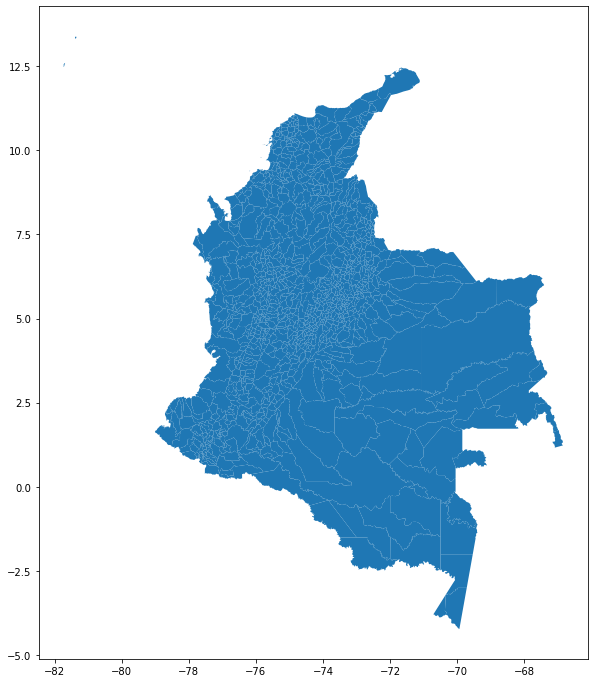

In [7]:
municipios.plot(figsize = (20,12))

In [14]:
datos_colombia = municipios.merge(hurtos_agrupados, left_on='MPIO_CCDGO', right_on='codigo_dane')
datos_colombia

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CCNCT,MPIO_NANO,DPTO_CNMBR,SHAPE_AREA,SHAPE_LEN,ORIG_FID,geometry,count


In [99]:
test = municipios.merge(hurtos_agrupados, left_on='cod_dane', right_on='codigo_dane')
test

,ID,TOTPOP_CY,Shape__Are,Shape__Len,geometry,count
0,05001,2559097,3.798647e+08,107257.930213,"POLYGON ((-8423087.868 710530.773, -8423036.11...",128
1,05042,27276,5.316765e+08,125471.413085,"POLYGON ((-8441952.863 743091.782, -8441804.23...",1
2,05079,54898,2.097249e+08,81485.206070,"POLYGON ((-8384334.497 725596.988, -8384301.37...",1
3,05088,557749,1.453409e+08,64621.581687,"POLYGON ((-8414216.495 717391.965, -8414173.23...",25
4,05129,84268,1.392255e+08,59368.364351,"POLYGON ((-8422545.420 682512.115, -8422535.17...",4
...,...,...,...,...,...,...
143,81736,63642,9.369985e+08,141398.578301,"POLYGON ((-7990416.423 788601.725, -7988234.65...",2
144,81794,49465,5.470561e+09,423567.434778,"POLYGON ((-7987012.869 747921.729, -7986932.18...",1
145,85001,179489,2.520565e+09,340545.621006,"POLYGON ((-8059071.489 620962.532, -8058983.23...",1
146,85410,25428,2.419753e+09,463096.658534,"POLYGON ((-8099064.113 577685.563, -8098973.32...",3


In [116]:
test = test.sort_values(by = 'count', ascending = False)
test.head(3)

,ID,TOTPOP_CY,Shape__Are,Shape__Len,geometry,count
17,11001,7822431,1.657425e+09,414367.022837,"POLYGON ((-8245739.733 538942.534, -8245676.51...",216
125,76001,2275444,5.675798e+08,122261.000357,"POLYGON ((-8526382.122 395080.815, -8526235.24...",194
0,05001,2559097,3.798647e+08,107257.930213,"POLYGON ((-8423087.868 710530.773, -8423036.11...",128


<AxesSubplot:>

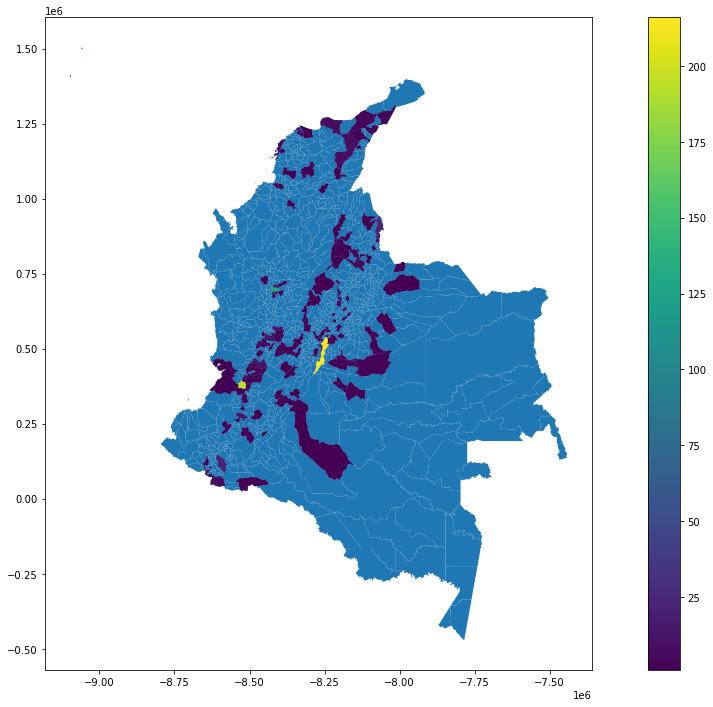

In [117]:
axis = municipios.plot(figsize = (20, 12))
test.plot(column = "count", ax = axis, legend = True)